In [1]:
import os
os.chdir('/scratch/ws/gpu16-d3hack2019-DeepHydro/')
!pwd

/lustre/scratch2/ws/gpu16-d3hack2019-DeepHydro


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
import numpy as np
import os, sys
import pandas as pd
from skimage.external import tifffile
import skimage
import scipy as sp
import scipy.fftpack

#!pip install --user seaborn
#!pip install --user statsmodels

import seaborn as sns
skimage.__version__

'0.14.1'

In [3]:
%load_ext autoreload
%autoreload 2
module_folder = os.path.abspath('./src')
#module_folder = 'src/'
if module_folder not in sys.path:
    sys.path.append(module_folder)
import deephydro

### Visualize the errors

- Load the csv file

In [14]:
data_folder = './output'
df_pred_name = 'df_pred.csv'

In [31]:
df_pred = pd.read_csv(os.path.join(data_folder, df_pred_name))
df_pred['error'] = df_pred.Q - df_pred.Q_pred

df_pred = df_pred.set_index(df_pred['Time'])
df_pred['month'] = pd.DatetimeIndex(df_pred.index).month
df_pred['year'] = pd.DatetimeIndex(df_pred.index).year
df_pred['day'] = pd.DatetimeIndex(df_pred.index).day

In [42]:
df_pred.head()
#df_pred.tail()

Unnamed: 0        Time         Q    Q_pred  Q_pred_sigma  \
Time                                                                   
2002-10-18       19283  2002-10-18  7.751387  7.270761      0.171377   
2002-10-19       19284  2002-10-19  7.892862  7.313520      0.164244   
2002-10-20       19285  2002-10-20  8.022064  7.274819      0.155929   
2002-10-21       19286  2002-10-21  8.158262  7.394279      0.145223   
2002-10-22       19287  2002-10-22  8.276609  7.326735      0.178478   

               error  month  year  day  
Time                                    
2002-10-18  0.480626     10  2002   18  
2002-10-19  0.579342     10  2002   19  
2002-10-20  0.747244     10  2002   20  
2002-10-21  0.763983     10  2002   21  
2002-10-22  0.949874     10  2002   22

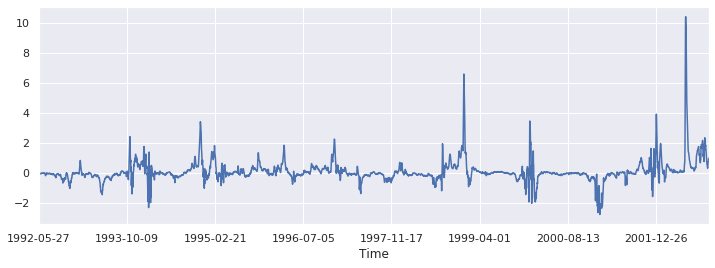

In [33]:
sns.set(rc={'figure.figsize':(12, 4)})
fig, ax = plt.subplots()
df_pred.error.plot()
plt.show()

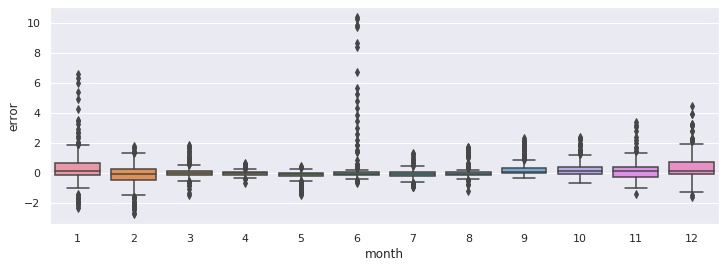

In [37]:
sns.set(rc={'figure.figsize':(12, 4)})
fig, ax = plt.subplots()
ax = sns.boxplot(x = 'month', y = 'error', data = df_pred)
plt.show()

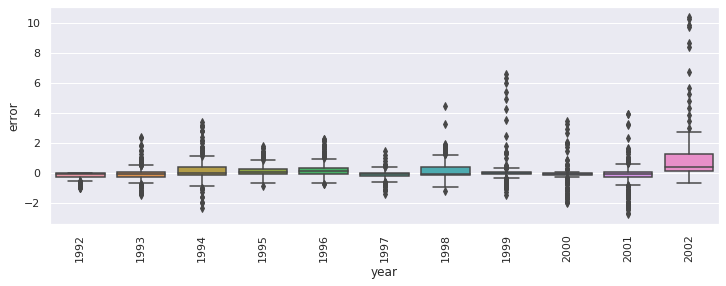

In [38]:
sns.set(rc={'figure.figsize':(12, 4)})
fig, ax = plt.subplots()
ax = sns.boxplot(x = 'year', y = 'error', data = df_pred)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

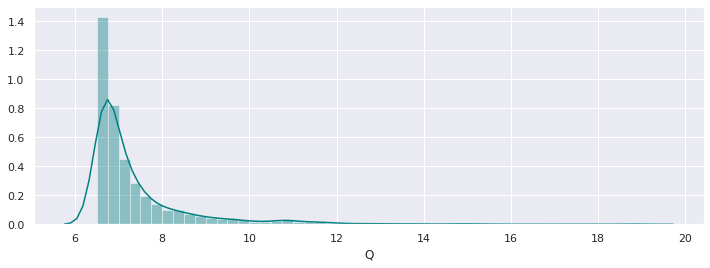

In [39]:
sns.set(rc={'figure.figsize':(12, 4)})
fig, ax = plt.subplots(sharex=True)
#series.Q.hist()

sns.distplot(df_pred["Q"] , color="teal", label="error")
plt.show()

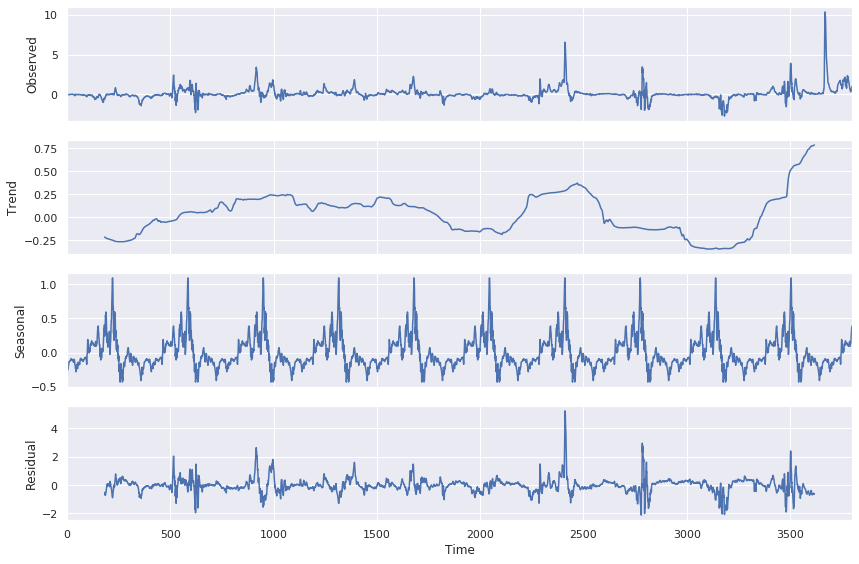

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set(rc={'figure.figsize':(12, 8)})
result = seasonal_decompose(df_pred.error.values, model = 'additive', freq = 365)
fig = result.plot()
#plt.xticks(df_pred.index.values)
plt.show()

In [67]:
result.seasonal

array([-0.3092312 , -0.31830836, -0.25121738, ...,  0.33121078,
        0.37086138,  0.38755739])

In [71]:
df_pred['Seasonal'] = result.seasonal
df_pred['Residual'] = result.resid
df_pred['Trend'] = result.trend

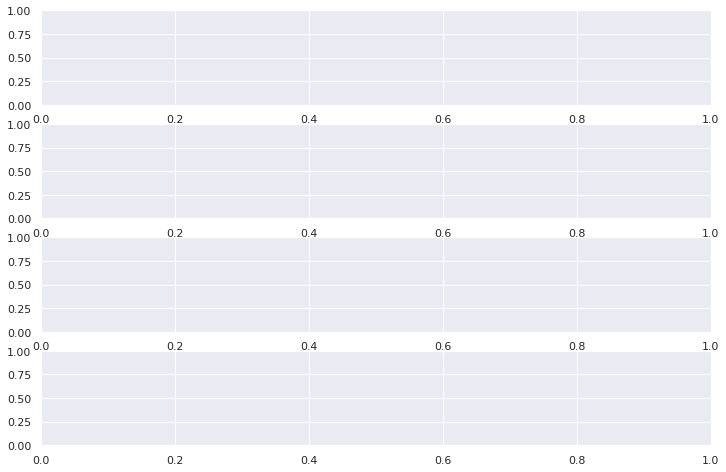

In [75]:
f, axes = plt.subplots(4, 1)

In [74]:
fig, axes = plt.subplots(4, 1, sharex=True)

axes[0].plot(df_pred.error)
axes[0].set_ylabel('Observed')

axes[1].plot(df_pred['Trend'])
axes[1].set_ylabel('Trend')

axes[2].plot(df_pred['Seasonal'])
axes[2].set_ylabel('Seasonal')

axes[3].plot(df_pred['Residual'])
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Time')
plt.show()

KeyboardInterrupt: 

In [ ]:
fig, axes = plt.subplots(4, 1, sharex=True)

axes[0].plot(df_pred.index, df_pred.error)
axes[0].set_ylabel('Observed')
fig.tight_layout()
plt.plot(fig)

/software/ml/JupyterHub/conda-powerai/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'PSD (dB)')

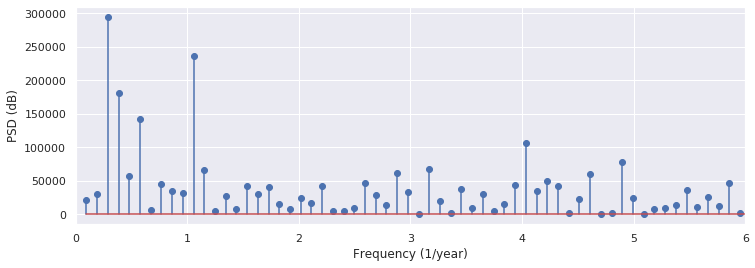

In [59]:
temp_fft = sp.fftpack.fft(df_pred.error)
temp_psd = np.abs(temp_fft) ** 2
fftfreq = sp.fftpack.fftfreq(len(temp_psd), 1. / 365)

# take only the positive frequencies
i = fftfreq > 0

sns.set(rc={'figure.figsize':(12, 4)})
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.stem(fftfreq[i], temp_psd[i])
ax.set_xlim(0, 6)
ax.set_xlabel('Frequency (1/year)')
ax.set_ylabel('PSD (dB)')

In [60]:
#sns.set(rc={'figure.figsize':(12, 4)})
#g = sns.FacetGrid(df_pred, col = "month", hue = "year", col_wrap = 3, palette='RdYlBu', sharey = False)
#g = (g.map(plt.plot, "day", "error").add_legend())

In [ ]:
get_ipython().magic('matplotlib inline')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

import netCDF4
import numpy as np
import os, sys
import pandas as pd
import seaborn as sns
import datetime

sns.set(style = "darkgrid")

from pyramid.arima import auto_arima

from pylab import rcParams
rcParams['figure.figsize'] = 12, 4

### Load the data

In [ ]:
os.chdir("C:/Users/Elona.Gusho/Desktop/DeepHydro-master/")
data_folder = 'DeepHydro-master'
data_disc = '01_discharge.csv'

series = pd.read_csv(os.path.join(data_folder, data_disc))
series = series. drop('Unnamed: 0' , axis='columns')
series['Time'] = pd.to_datetime(series['Time'])
series = series.set_index('Time')

series['month'] = pd.DatetimeIndex(series.index).month
series['year'] = pd.DatetimeIndex(series.index).year
series['day'] = pd.DatetimeIndex(series.index).day

series.head()

## Summary Statistics 

### Description

In [ ]:
series.Q.describe()
# series.groupby('month', as_index=False).agg({"Q": "describe"})

### Create plots

#### Original time series

In [ ]:
sns.set(rc={'figure.figsize':(12, 4)})
fig, ax = plt.subplots()
series.Q.plot()
plt.show()

### Original time series - divided monthly

In [ ]:
sns.set(rc={'figure.figsize':(12, 4)})
g = sns.FacetGrid(series, col = "month", hue = "year", col_wrap = 3, palette='RdYlBu', sharey = False)
g = (g.map(plt.plot, "day", "Q").add_legend())

### Monthly boxplot

In [ ]:
sns.set(rc={'figure.figsize':(12, 4)})
fig, ax = plt.subplots()
ax = sns.boxplot(x = 'month', y = 'Q', data = series)
plt.show()

### Yearly boxplot

In [ ]:
sns.set(rc={'figure.figsize':(12, 4)})
fig, ax = plt.subplots()
ax = sns.boxplot(x = 'year', y = 'Q', data = series)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [ ]:
df2_mean = pd.pivot_table(series, index = 'year', columns = 'month', values = 'Q', aggfunc=np.mean)
df2_std = pd.pivot_table(series, index = 'year', columns = 'month', values = 'Q', aggfunc=np.std)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
fig.subplots_adjust(hspace = 6)
fig.suptitle('Aggregated data on month and year')

plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1).set_title('Mean value for the monthly aggregation')
sns.heatmap(df2_mean, cmap = "YlGnBu")
plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2).set_title('Std value for the monthly aggregation')
sns.heatmap(df2_std, cmap = "YlGnBu")

### Histogram 

In [ ]:
sns.set(rc={'figure.figsize':(12, 4)})
fig, ax = plt.subplots(sharex=True)
#series.Q.hist()

sns.distplot(series["Q"] , color="teal", label="Q")
plt.show()

#fig, ax = plt.subplots()
#fig.set_size_inches((12,4))
#series.Q.plot(kind='kde')
#plt.show()

### Lagged plot

In [ ]:
from pandas.plotting import lag_plot
sns.set(rc={'figure.figsize':(12, 4)})
fig, ax = plt.subplots()
lag_plot(series.Q,  ax = ax)

## Autocorrleation and partial Autocorrelation

### Autocorrelation plot

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
sns.set(rc={'figure.figsize':(12, 4)})
fig, ax = plt.subplots()
x = plot_acf(series.Q.values.squeeze(),  ax = ax, lags=500)

### Partial Autocorrelation

In [ ]:
sns.set(rc={'figure.figsize':(12, 4)})
fig, ax = plt.subplots()
x = plot_pacf(series.Q.values.squeeze(), ax = ax, lags = 15)

## Time series decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set(rc={'figure.figsize':(12, 8)})
result = seasonal_decompose(series.Q.values, model = 'additive', freq = 365)
fig = result.plot()
plt.show()

### Detrend by Differencing

In [ ]:
sns.set(rc={'figure.figsize':(12, 4)})
fig, ax = plt.subplots()
plt.plot(series.Q.diff())

## Frequency domain visualization

In [ ]:
import scipy as sp
import scipy.fftpack

In [ ]:
temp_fft = sp.fftpack.fft(series.Q)
temp_psd = np.abs(temp_fft) ** 2
fftfreq = sp.fftpack.fftfreq(len(temp_psd), 1. / 365)

# take only the positive frequencies
i = fftfreq > 0

In [ ]:
sns.set(rc={'figure.figsize':(12, 4)})
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(fftfreq[i], temp_psd[i])
ax.set_xlim(0, 7)
ax.set_xlabel('Frequency (1/year)')
ax.set_ylabel('PSD (dB)')

In [ ]:
temp_fft_bis = temp_fft.copy()
temp_fft_bis[np.abs(fftfreq) > 5] = 0

In [ ]:
temp_slow = np.real(sp.fftpack.ifft(temp_fft_bis))
sns.set(rc={'figure.figsize':(12, 4)})
fig, ax = plt.subplots(1, 1)
date = series.index
ax.plot_date(date, series.Q,  lw = .5)
ax.plot_date(date, temp_slow, '-')
ax.set_xlim(datetime.date(1998, 1, 1),
            datetime.date(2016, 1, 1))
ax.set_xlabel('Date')
ax.set_ylabel('Q')